# System Set Up

In [ ]:
# dataset to be used: "Medical-Insurance.csv"
# upload datasets to a folder in Google Drive, e.g., My Drive/Colab Data
# connect to Google Drive, path to datasets is "/content/drive/My Drive/Colab Data/..."
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# after installation, import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *


# sklearn data and model packages
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

# sklearn model metrics (evaluation) packages
from sklearn.metrics import *

# regression summary
!pip install -U dmba;
from dmba import regressionSummary

# Decision Tree Requirements
from sklearn.tree import DecisionTreeClassifier

#LogisticRegression Requirements
from sklearn.preprocessing import StandardScaler

#Regression Tree Set Up
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree



!pip install dtreeviz
import dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 78.6 MB/s eta 0:00:00
Colab environment detected.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.8 MB/s eta 0:00:00


# Data Preprocessing

In [ ]:
# Medical Insurance Cost Per Person - Medical-Insurance.csv

# load data as a Dataframe
insurance_df = pd.read_csv("/content/drive/My Drive/Colab Data/Medical-Insurance.csv", header=None)
insurance_df.columns = ['age', 'gender', 'BMI', 'children', 'smoker', 'region', 'insurance_price']

# check if data is loaded correctly
insurance_df.head(10)




,age,gender,BMI,children,smoker,region,insurance_price
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [ ]:
### Preprocessing
# Missing Values Block
# Missing counts of age
age_null = (insurance_df["age"] == "?").sum()
print('Missing Age Count')
print(age_null)
# Missing Count of Smoking
smoker_null = (insurance_df["smoker"] == "?").sum()
print('Missing Smoke Count')
print(smoker_null)


Missing Age Count
4
Missing Smoke Count
7


In [ ]:
### Preprocessing
# print all the rows with a missing values
row_with_null = insurance_df.index[insurance_df.eq('?').any(axis=1)]
print('___')
print("Rows with missing values")
print(row_with_null)
print("Total null values:", len(row_with_null))

___
Rows with missing values
Index([5, 28, 72, 122, 176, 234, 242, 324, 1836, 2180, 2664], dtype='int64')
Total null values: 11


In [ ]:
### Preprocessing
##Droping entires that have missing values

# drop missing values
insurance_df = insurance_df.drop(row_with_null)

# rest the index after dropping empty row
insurance_df = insurance_df.reset_index(drop=True)
insurance_df

insurance_df.head(10)


,age,gender,BMI,children,smoker,region,insurance_price
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [ ]:
### Preprocessing
# convert the age and smoker columns into integers to enable analysis
insurance_df['age'] = insurance_df['age'].astype(int)
insurance_df['smoker'] = insurance_df['smoker'].astype(int)

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2761 non-null   int64  
 1   gender           2761 non-null   int64  
 2   BMI              2761 non-null   float64
 3   children         2761 non-null   int64  
 4   smoker           2761 non-null   int64  
 5   region           2761 non-null   int64  
 6   insurance_price  2761 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.1 KB


Total new number of entries: 2761 (2772)

Total number of variables: 7

Age 18-64

Gender: Male (1) or Female (2)

BMI: varies widely

Children: 0-5 dependents

Smokers: Yes (1) or No (0)

Region:  NW (1) NE (2) SW (3) SE (4)

# General Database Characteristics


In [ ]:
### Generate Correlation Matrix to view initial relationships between variables, specifically its effect on insurance_price
## Smoking Variable has strong correlation (0.790) with insurance_price, suggesting "big jump" in insurance prices between smokers and non-smokers
## Age variable shows a moderate positive correlation (0.297) with insurance_price, suggesting that older individuals tend to have higher charges
## BMI variable has a weaker, but noticeable positive correlation (0.199) with insurance_price
## Other variables, children, gender, and region have smaller correlations, suggesting less predicitve power on their own

#correlation table
corr_mat = insurance_df.corr()
corr_mat

,age,gender,BMI,children,smoker,region,insurance_price
age,1.000000,-0.025362,0.112373,0.036304,-0.023661,-0.008419,0.297487
gender,-0.025362,1.000000,0.043968,0.015239,0.081855,0.023422,0.063768
BMI,0.112373,0.043968,1.000000,-0.001392,0.010444,0.270823,0.199372
children,0.036304,0.015239,-0.001392,1.000000,0.007045,-0.025228,0.066809
smoker,-0.023661,0.081855,0.010444,0.007045,1.000000,0.053867,0.789585
region,-0.008419,0.023422,0.270823,-0.025228,0.053867,1.000000,0.053016
insurance_price,0.297487,0.063768,0.199372,0.066809,0.789585,0.053016,1.000000


High correlation between smoker and insurance_price

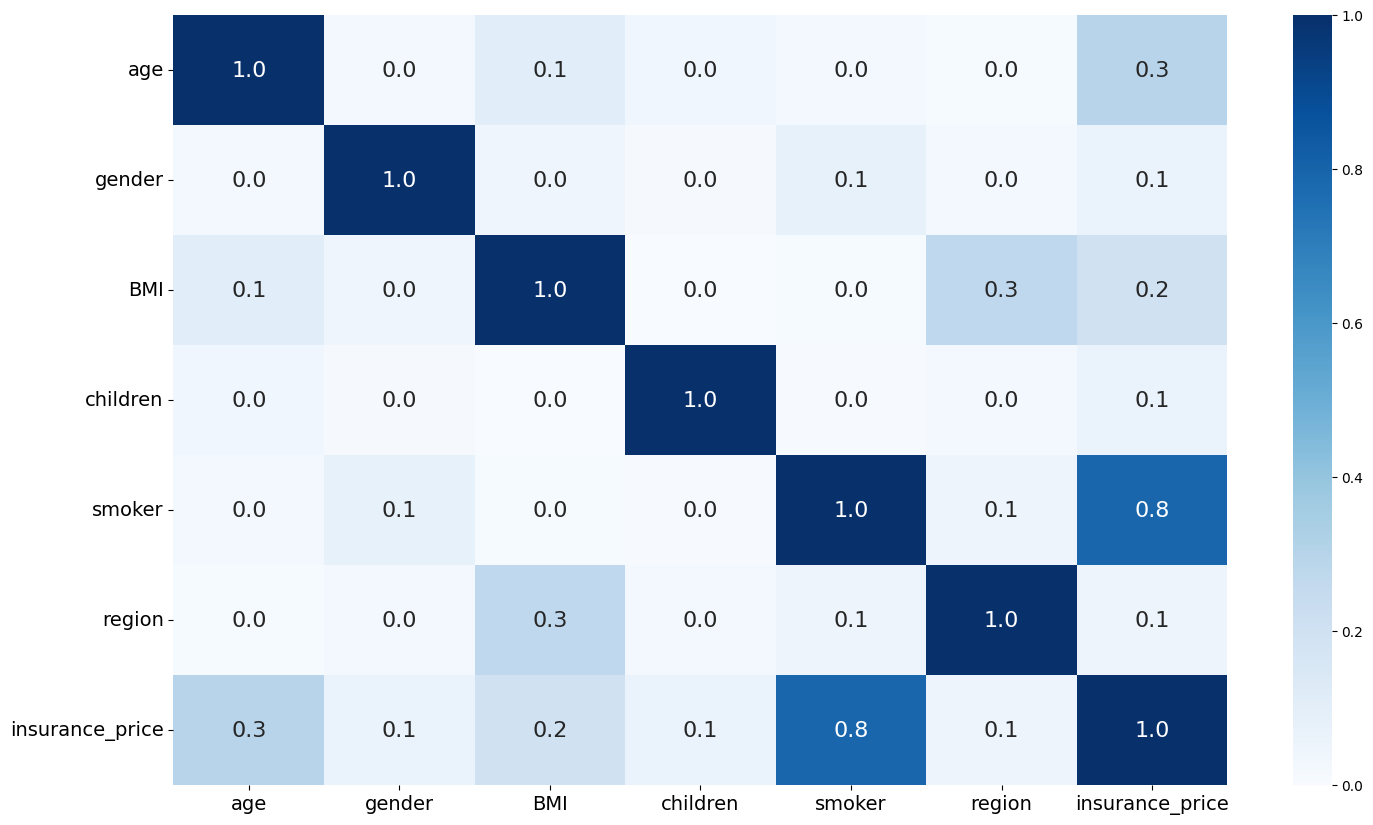

In [ ]:
plt.figure(figsize=(17,10))
ax = sns.heatmap(np.absolute(corr_mat), annot=True, fmt=".1f", vmin=0, vmax=1, cmap="Blues", annot_kws={"size": 16})
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', rotation = 360, labelsize=14)

In [ ]:
#Showcasing the number of smokers in different regions NW (1) NE (2) SW (3) SE (4)
#Appears to be large number of smokers found in the Southeast of the United States of America

smokers_by_region = insurance_df[insurance_df['smoker'] == 1]['region'].value_counts()
print(smokers_by_region)

region
4    192
2    135
3    118
1    118
Name: count, dtype: int64


Text(0.5, 1.0, 'Region NW, NE, SW, SE Number of Smokers vs. Number of Smokers')

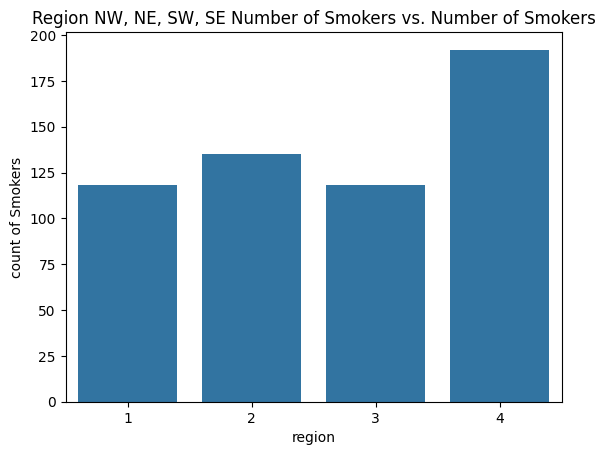

In [ ]:
#Visual Representation of number of smokers in different regions NW (1) NE (2) SW (3) SE (4)
smokers_by_region = insurance_df[insurance_df['smoker'] == 1]['region'].value_counts()
sns.barplot(x = smokers_by_region.index, y = smokers_by_region.values)
plt.ylabel('count of Smokers')
plt.title("Region NW, NE, SW, SE Number of Smokers vs. Number of Smokers")

Text(0.5, 1.0, 'Insurance Price Between Males (1) non-smokers and smokers and Females (1) non-smokers and smokers')

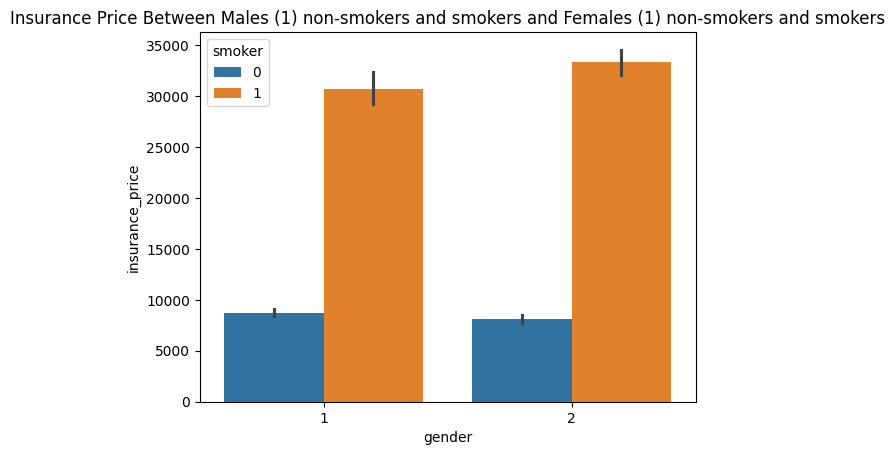

In [ ]:
## This bar chart compares the average insurance price across both male (1) and female (2) individuals
# For both genders smokers (1) pay significantly more compares to non-smokers, where both genders pay similar amounts
# Showcases gender does not have a signficant impact on the insurance price when smoking is also considered
# Reinforces belief that smoking is a huge determinant

sns.barplot(data=insurance_df, x='gender', y='insurance_price', hue='smoker')
plt.title("Insurance Price Between Males (1) non-smokers and smokers and Females (1) non-smokers and smokers")

Text(0.5, 1.0, 'Number of Children vs. Insurance Price')

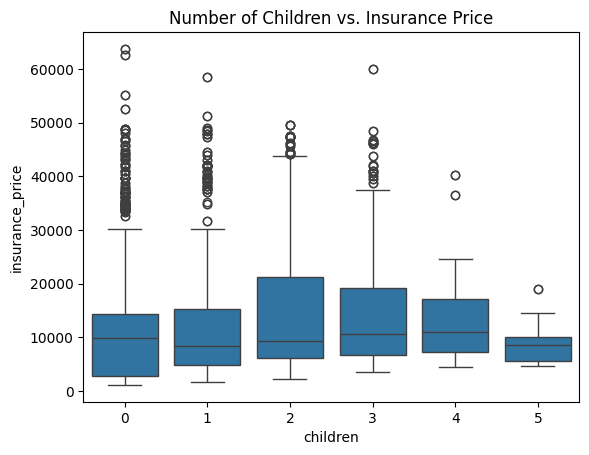

In [ ]:
## Boxplot shows that the number of children has no strong or consistent effect on the insurance price
# The median insurance cost stays relatively similar regardless of the number of children a person has
# The wide vertical spread is not determined by the number of children but rather by other factors, primarily caused by smoking
sns.boxplot(data=insurance_df, x='children', y='insurance_price')
plt.title("Number of Children vs. Insurance Price")

Text(0.5, 1.0, 'Smoking Status vs. BMI')

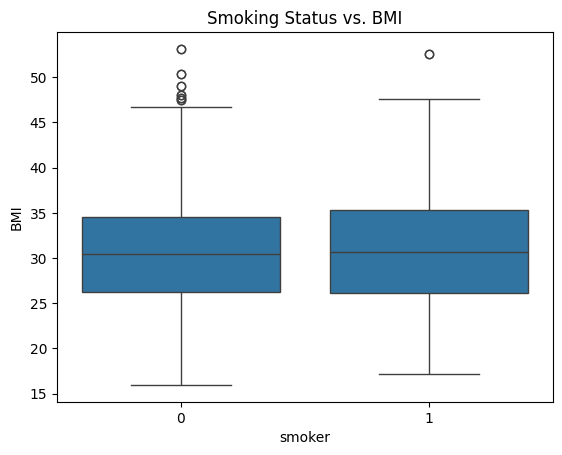

In [ ]:
## Comparison of smoking status with BMI level
# Median BMI are nearly identical between non-smokers and smokers indidicating being a smoker does not mean one has a higher BMI
# Overall distribution between individuals who do not smoke and smoke and their respective BMIs is very similar
# Confirms that BMI is not a significant driver for insurance prices
sns.boxplot(data=insurance_df, x='smoker', y='BMI')
plt.title("Smoking Status vs. BMI")

Text(0.5, 1.0, 'BMI vs. Insurance Price given Smoking Status')

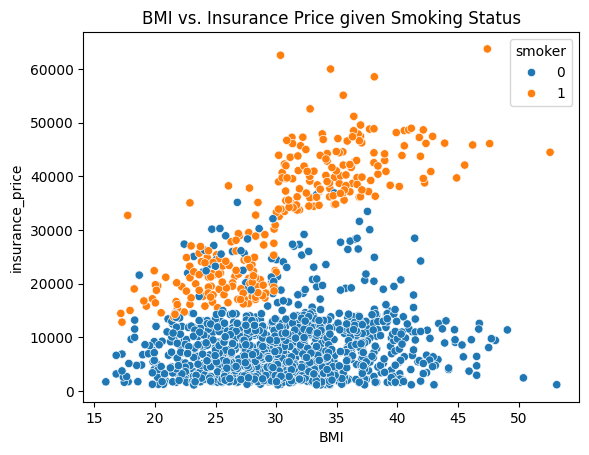

In [ ]:
## This scatterplot highlights something that the previous boxplot can't: the interaction effect between BMI, smoking and insurance prices
# Majority of non-smokers, with a wide range of BMIs, all cluster below an insurance cost of $15k
# BMI does increase the insurance price, but more signficantly for smokers: smokers with high BMIs have insurance prices skyrocket to $50k+
# Signals a strong non-linear relationship between insurance price, smoking, and BMI
sns.scatterplot(data=insurance_df, x='BMI', y='insurance_price', hue='smoker')
plt.title("BMI vs. Insurance Price given Smoking Status")

Text(0.5, 1.0, 'Smoking Status vs. Avg. Insurance Price')

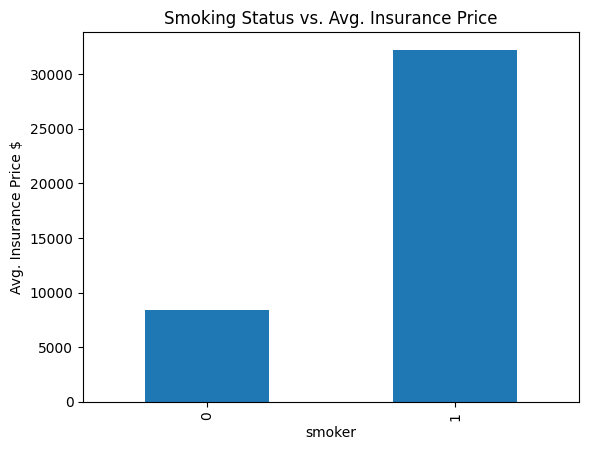

In [ ]:
### Set up ###
# Initital bar graph showing the huge difference in average insurance price between non-smokers and smokers
# Non-smokers have an average insurance price of around $8k while smokers have a larger average insurance price of around $35k
smoker_prices = insurance_df.groupby('smoker').insurance_price.mean()
# barchart of smoker vs. mean insurance price
ax = smoker_prices.plot(kind='bar')
ax.set_ylabel('Avg. Insurance Price $')
plt.title("Smoking Status vs. Avg. Insurance Price")

mean price: 13274.75930054618
median price: 9377.9047
mode price: 2166.0164685


/tmp/ipython-input-2652583412.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


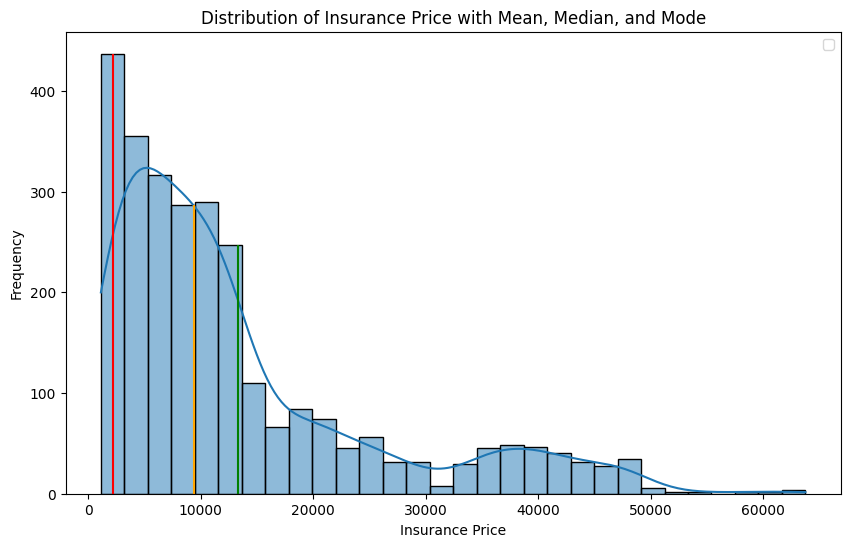

In [ ]:
# calculate the mean of the 'insurance_price' column
mean_price = insurance_df['insurance_price'].mean()

# calculate the median of the 'insurance_price' column
median_price = insurance_df['insurance_price'].median()

# 4. Calculate approximate mode using binning
counts, bins = np.histogram(insurance_df['insurance_price'], bins=30)
max_count_idx = np.argmax(counts)
mode_price = (bins[max_count_idx] + bins[max_count_idx + 1]) / 2

print("mean price:", mean_price)
print("median price:", median_price)
print("mode price:", mode_price)

fig, ax = plt.subplots(figsize=(10, 6))
hist_data = sns.histplot(data=insurance_df, x='insurance_price', bins=30, kde=True, ax=ax)

def get_bar_height(hist_plot, x_value):
    for patch in hist_plot.patches:
        if patch.get_x() <= x_value < patch.get_x() + patch.get_width():
            return patch.get_height()
    return


mean_height = get_bar_height(hist_data, mean_price)
median_height = get_bar_height(hist_data, median_price)
mode_height = get_bar_height(hist_data, mode_price)

ax.vlines(mean_price, ymin=0, ymax=mean_height, color='green', linestyle='solid')
ax.vlines(median_price, ymin=0, ymax=median_height, color='orange', linestyle='solid')
ax.vlines(mode_price, ymin=0, ymax=mode_height, color='red', linestyle='solid')


ax.set_title('Distribution of Insurance Price with Mean, Median, and Mode')
ax.set_xlabel('Insurance Price')
ax.set_ylabel('Frequency')


ax.legend()
plt.show()

Text(0.5, 1.0, 'Smoker vs. Insurance Price Distribution')

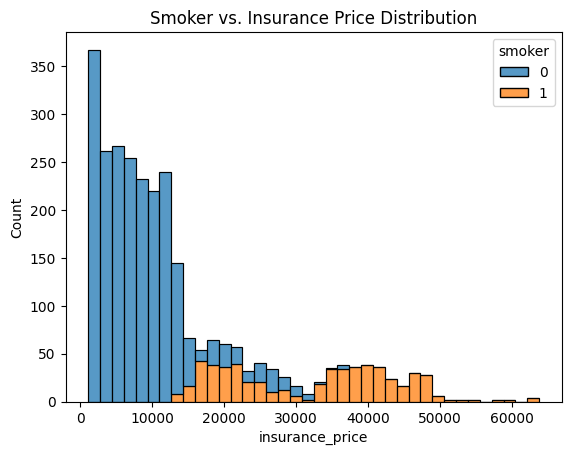

In [ ]:
## Stacked histogram compares the distribution of insurance prices between smokers (1) and non-smokers (2)
# Blue bars represent non-smokers and are heavily concetrated between $0 and $12k
# Very few non-smokers have insurance prices larger than $20k
# Orange bars represent smokers (1) extend far into the $60k, implying that there is a high frequency of high insurance prices for smokers
## Clear discontinuity between smokers and non-smokers and their respective insurance prices
# Clear jump in prices between non-smokers and smokers
sns.histplot(data=insurance_df, x="insurance_price", hue="smoker", multiple = "stack")
plt.title("Smoker vs. Insurance Price Distribution")

Text(0.5, 1.0, 'Boxplot: Smoking Status vs. Insurance Price')

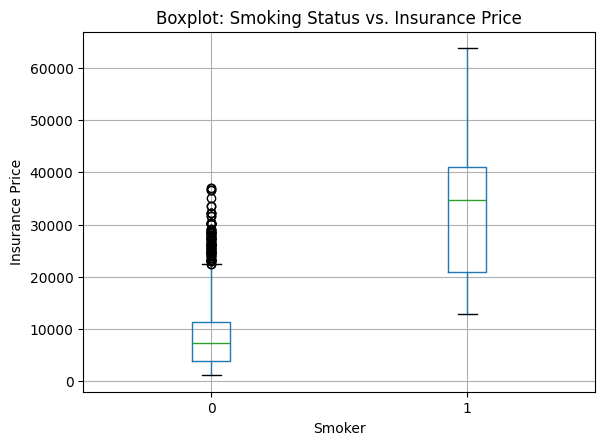

In [ ]:
## Boxplot of smoking status vs. insurance price reveals huge prices difference between non-smokers and smokers
# Smokers (1) have a wider spread in the insurance prices indicating high variability
# Smoking increases both prices and volatility

ax = insurance_df.boxplot(column='insurance_price', by='smoker')
ax.set_xlabel('Smoker')
ax.set_ylabel('Insurance Price')
plt.suptitle('')
plt.title('Boxplot: Smoking Status vs. Insurance Price')

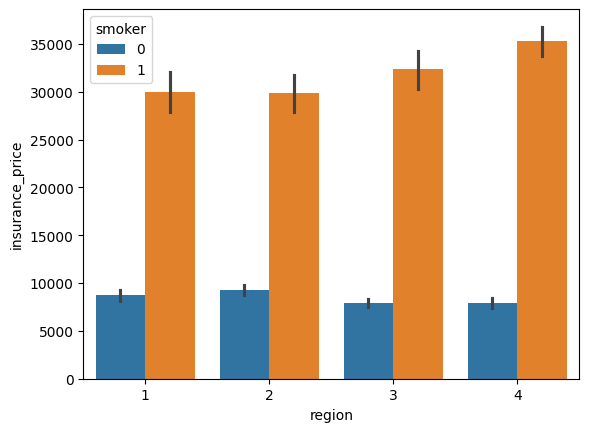

In [ ]:
sns.barplot(data=insurance_df, x='region', y='insurance_price', hue="smoker");

# Checking for potential confounding factors such as price being skued based
# on region due to concentration of smoker or if smokers are charged differently
# based on region

Text(0.5, 1.0, 'Distribution of Insurance Price between Non-Smokers (0) and Smokers (1)')

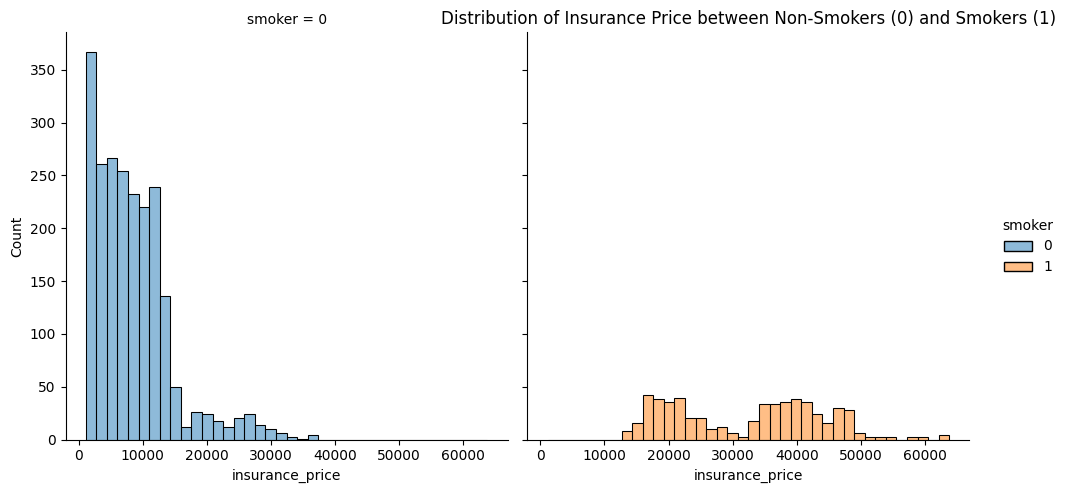

In [ ]:
## The distribution of the insurance price between non-smokers and smokers
# Non smokers do not have any insurance price greater thahn $40k
# Smokers, on the other hand, have a few cases of individuals with insurance prices greater than $50k
# These, we consider, are outliers in the dataset
sns.displot(data=insurance_df, x="insurance_price", hue="smoker", col="smoker")
plt.title('Distribution of Insurance Price between Non-Smokers (0) and Smokers (1)')

In [ ]:
# Although relatively few and extreme, these numbers still represent realistic insurance prices given extenuating medical cirumstances
#Filter how many individuals have an insurance price greater than 50,0000: 14 individuals
insurance_price_extreme = (insurance_df['insurance_price'] > 50000).sum()
print("Number of individuals who smoke who have exteme insurance costs:", insurance_price_extreme)


Number of individuals who smoke who have exteme insurance costs: 14


In [ ]:
## Specifically, only 6 individuals have insurance prices exceeding $60k
# Filter the DataFrame to show rows where insurance_price is greater than 60000
high_insurance_price_df = insurance_df[insurance_df['insurance_price'] > 60000]

# Display the resulting DataFrame
display(high_insurance_price_df)

,age,gender,BMI,children,smoker,region,insurance_price
535,54,1,47.410,0,1,4,63770.42801
1222,52,2,34.485,3,1,1,60021.39897
1292,45,2,30.360,0,1,4,62592.87309
1920,54,1,47.410,0,1,4,63770.42801
2606,52,2,34.485,3,1,1,60021.39897
2675,45,2,30.360,0,1,4,62592.87309


Based on our exploratory analysis, insurance prices, it is quite clear that insurance prices do not follow a linear relationship between variables.

Insurance prices, instead, follow a non-linear pattern caused primarily by the smoking status of individuals, age and BMI.
  
The Gender, Number of Children, and Region variables have a weak effect on the insurance price, with the insurance cost being relatively similar when either gender does not smoke.

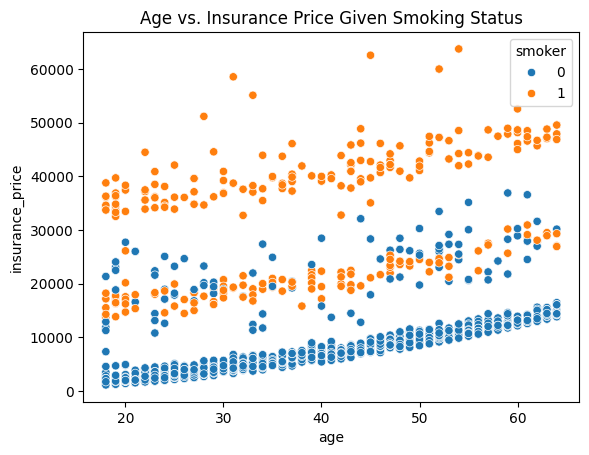

In [ ]:
## Most striking pattern
# Reveals distinct "cost profiles" between non-smokers and smokers impacted by the age of the patient
# Graph highlights smoking creating "cost profiles"
# Three noticeable cost tiers
# Serves as basis for our two part algorithm
sns.scatterplot(data=insurance_df, x='age', y='insurance_price', hue='smoker');
plt.title('Age vs. Insurance Price Given Smoking Status');

# **Baseline**

In [ ]:
# target variable
y = insurance_df['insurance_price']

# naive prediction: always predict the mean
y_pred_baseline = np.full_like(y, fill_value=y.mean(), dtype=np.float64)

# compute RMSE
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred_baseline))

# compute MAE
baseline_mae = mean_absolute_error(y, y_pred_baseline)

# print baselines
print("Baseline RMSE (predicting mean):", baseline_rmse)
print("Baseline MAE (predicting mean):", baseline_mae)

Baseline RMSE (predicting mean): 12156.555996766305
Baseline MAE (predicting mean): 9132.436621477142


# **Regression with K-Fold**

In [ ]:
def run_kfold_evaluation(model, X, y, n_splits=5, random_state=42):
    """
    Performs K-Fold cross-validation for a given regression model.

    Args:
        model: The scikit-learn regression model (e.g., LinearRegression, DecisionTreeRegressor, Pipeline).
        X (pd.DataFrame): Feature dataset.
        y (pd.Series): Target variable.
        n_splits (int): Number of folds for K-Fold cross-validation.
        random_state (int): Random state for KFold to ensure reproducibility.

    Returns:
        tuple: A tuple containing the average MAE, RMSE, average R-squared score, list of all RMSE scores, and list of all R-squared scores and potential features
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    mae_scores = []
    rmse_scores = []
    r2_scores = []
    feature_importances_per_fold = [] # Initialize list to store feature importances

    print(f"Performing {n_splits}-fold cross-validation...")

    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_kf, y_train_kf)
        y_pred_kf = model.predict(X_test_kf)

        rmse_kf = np.sqrt(mean_squared_error(y_test_kf, y_pred_kf))
        mae_kf = mean_absolute_error(y_test_kf, y_pred_kf)
        r2_kf = r2_score(y_test_kf, y_pred_kf)

        mae_scores.append(mae_kf)
        rmse_scores.append(rmse_kf)
        r2_scores.append(r2_kf)

        # Check for feature importances and store them
        if hasattr(model, 'feature_importances_'):
            feature_importances_per_fold.append(model.feature_importances_)
        elif hasattr(model, 'named_steps') and 'regressor' in model.named_steps and hasattr(model.named_steps['regressor'], 'feature_importances_'):
            feature_importances_per_fold.append(model.named_steps['regressor'].feature_importances_)

        print(f"  Fold {fold+1} - MAE: {mae_kf:.3f}, RMSE: {rmse_kf:.3f}, R^2: {r2_kf:.3f}")

    avg_mae = np.mean(mae_scores)
    avg_rmse = np.mean(rmse_scores)
    avg_r2 = np.mean(r2_scores)

    avg_feature_importances = None
    if feature_importances_per_fold:
        avg_feature_importances = np.mean(feature_importances_per_fold, axis=0)


    print(f"\nAverage MAE across all folds: {avg_mae:.3f}")
    print(f"Average RMSE across all folds: {avg_rmse:.3f}")
    print(f"Average R^2 score across all folds: {avg_r2:.3f}")

    return avg_mae, avg_rmse, avg_r2, rmse_scores, r2_scores, avg_feature_importances

## Linear Regression

In [ ]:
# Example usage for Linear Regression
print("--- Linear Regression K-Fold Evaluation ---")

# Ensure X and y are defined as per the Linear Regression model's requirements (with categorical features)
X_lr = insurance_df.drop('insurance_price', axis=1)
y_lr = insurance_df['insurance_price']

# Create the Linear Regression Pipeline for the function call
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_lr = ["gender", "smoker", "region"]
numeric_lr = ["age", "BMI", "children"]

preprocessor_lr = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_lr),
        ("num", "passthrough", numeric_lr)
    ]
)

linear_regression_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor_lr),
    ("regressor", LinearRegression())
])

avg_mae_best_lr, avg_rmse_best_lr, avg_r2_best_lr, rmse_lr_best_folds, r2_lr_best_folds, lr_feature_best_importance = run_kfold_evaluation(linear_regression_pipeline, X_lr, y_lr, n_splits=5)


--- Linear Regression K-Fold Evaluation ---
Performing 5-fold cross-validation...
  Fold 1 - MAE: 4409.453, RMSE: 6391.562, R^2: 0.707
  Fold 2 - MAE: 4157.145, RMSE: 6138.562, R^2: 0.752
  Fold 3 - MAE: 3967.192, RMSE: 5773.669, R^2: 0.777
  Fold 4 - MAE: 4587.962, RMSE: 6475.198, R^2: 0.749
  Fold 5 - MAE: 3787.106, RMSE: 5538.936, R^2: 0.763

Average MAE across all folds: 4181.771
Average RMSE across all folds: 6063.585
Average R^2 score across all folds: 0.750


## Polynomial Regression

Works better with non-linear data, increasing the degree/complexity between features and target

In [ ]:
# create polynomial regression pipeline
polynomial_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor_lr),
    ("scaler", StandardScaler(with_mean=False)),
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("regressor", LinearRegression())
])

# perform k-fold cross validation
avg_mae_best_pr, avg_rmse_best_pr, avg_r2_best_pr, rmse_pr_best_folds, r2_pr_best_folds, pr_feature_best_importance = run_kfold_evaluation(polynomial_pipeline, X_lr, y_lr, n_splits=5)


Performing 5-fold cross-validation...
  Fold 1 - MAE: 2950.360, RMSE: 4958.743, R^2: 0.824
  Fold 2 - MAE: 2834.777, RMSE: 4765.706, R^2: 0.850
  Fold 3 - MAE: 2759.061, RMSE: 4632.878, R^2: 0.856
  Fold 4 - MAE: 3059.226, RMSE: 5098.406, R^2: 0.844
  Fold 5 - MAE: 2747.441, RMSE: 4378.814, R^2: 0.852

Average MAE across all folds: 2870.173
Average RMSE across all folds: 4766.909
Average R^2 score across all folds: 0.845


## Ridge Regression

Reduces standard errors by biasing the regressino estimate against multicollinearity.

In [ ]:
ridge_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor_lr),
    ("regressor", Ridge())
])

param_grid_ridge = {
    "regressor__alpha": [0.001, 0.01, 0.1, 1.0, 10, 100, 1000] # regulariztion strength that helps control model complexity
}

grid_ridge = GridSearchCV(
    ridge_pipeline,
    param_grid_ridge,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_ridge.fit(X_lr, y_lr)

print("Best Ridge α:", grid_ridge.best_params_["regressor__alpha"])
print("Best Cross-Validated R²:", grid_ridge.best_score_)

best_ridge_model = grid_ridge.best_estimator_

avg_mae_best_ridge, avg_rmse_best_ridge, avg_r2_best_ridge, rmse_ridge_best_folds, r2_ridge_best_folds, _ = run_kfold_evaluation(best_ridge_model, X_lr, y_lr, n_splits=5)


Best Ridge α: 0.1
Best Cross-Validated R²: 0.7509516527121407
Performing 5-fold cross-validation...
  Fold 1 - MAE: 4409.915, RMSE: 6391.457, R^2: 0.707
  Fold 2 - MAE: 4157.698, RMSE: 6138.591, R^2: 0.752
  Fold 3 - MAE: 3967.701, RMSE: 5773.752, R^2: 0.777
  Fold 4 - MAE: 4588.430, RMSE: 6475.210, R^2: 0.749
  Fold 5 - MAE: 3787.594, RMSE: 5538.908, R^2: 0.763

Average MAE across all folds: 4182.268
Average RMSE across all folds: 6063.584
Average R^2 score across all folds: 0.750


## Lasso Regression

Same idea as ridge except penalizes the absolute magnitude of the regression coefficient.

In [ ]:
lasso_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor_lr),
    ("regressor", Lasso(max_iter=10000, random_state=42))  # Lasso needs more iterations to converge
])

param_grid_lasso = {
    "regressor__alpha": np.logspace(-3, 2, 10)  # explore a wide range of regularization strengths
}

grid_lasso = GridSearchCV(
    lasso_pipeline,
    param_grid_lasso,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_lasso.fit(X_lr, y_lr)

print("Best Lasso α:", grid_lasso.best_params_["regressor__alpha"])
print("Best Cross-Validated R²:", grid_lasso.best_score_)

best_lasso_model = grid_lasso.best_estimator_

avg_mae_best_lasso, avg_rmse_best_lasso, avg_r2_best_lasso, rmse_lasso_best_folds, r2_lasso_best_folds, _ = run_kfold_evaluation(
    best_lasso_model, X_lr, y_lr, n_splits=5
)

Best Lasso α: 7.742636826811277
Best Cross-Validated R²: 0.7509948740849397
Performing 5-fold cross-validation...
  Fold 1 - MAE: 4410.680, RMSE: 6391.560, R^2: 0.707
  Fold 2 - MAE: 4156.820, RMSE: 6136.508, R^2: 0.752
  Fold 3 - MAE: 3968.173, RMSE: 5772.784, R^2: 0.777
  Fold 4 - MAE: 4591.002, RMSE: 6476.062, R^2: 0.749
  Fold 5 - MAE: 3787.557, RMSE: 5538.596, R^2: 0.763

Average MAE across all folds: 4182.846
Average RMSE across all folds: 6063.102
Average R^2 score across all folds: 0.750


## Decision Tree Regresssion

In [ ]:
X_dt = insurance_df.drop(columns=['insurance_price'])
y_dt = insurance_df['insurance_price']

decision_tree_model = DecisionTreeRegressor(random_state=42)

param_grid_dt = {
    'max_depth': [5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'min_impurity_decrease': [0.0001, 0.001],
}

gridSearch_dt = GridSearchCV(
    estimator=decision_tree_model,
    param_grid=param_grid_dt,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

gridSearch_dt.fit(X_dt, y_dt)

best_params_dt = gridSearch_dt.best_params_

print("Best Decision Tree params:", best_params_dt)
print("Best Cross-Validated R²:", gridSearch_dt.best_score_)

best_dt_model = gridSearch_dt.best_estimator_

avg_mae_best_dt, avg_rmse_best_dt, avg_r2_best_dt, rmse_folds_best_dt, r2_folds_best_dt, feature_importances_best_dt = run_kfold_evaluation(
    best_dt_model, X_dt, y_dt, n_splits=5
)

Best Decision Tree params: {'max_depth': 30, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validated R²: 0.9966686644584197
Performing 5-fold cross-validation...
  Fold 1 - MAE: 497.466, RMSE: 2599.089, R^2: 0.952
  Fold 2 - MAE: 611.839, RMSE: 2791.694, R^2: 0.949
  Fold 3 - MAE: 522.793, RMSE: 2867.942, R^2: 0.945
  Fold 4 - MAE: 907.505, RMSE: 3477.335, R^2: 0.928
  Fold 5 - MAE: 497.598, RMSE: 2553.632, R^2: 0.950

Average MAE across all folds: 607.440
Average RMSE across all folds: 2857.938
Average R^2 score across all folds: 0.944


## Random Forest Regression

In [ ]:
X_rf = insurance_df.drop(columns=['insurance_price'])
y_rf = insurance_df['insurance_price']

random_forest_model = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None],
    'min_impurity_decrease': [0.0, 0.0001]
}

gridSearch_rf = GridSearchCV(
    estimator=random_forest_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

gridSearch_rf.fit(X_rf, y_rf)

best_params_rf = gridSearch_rf.best_params_

print("Best Random Forest params:", best_params_rf)
print("Best Cross-Validated R²:", gridSearch_rf.best_score_)

best_rf_model = gridSearch_rf.best_estimator_

avg_mae_best_rf, avg_rmse_best_rf, avg_r2_best_rf, rmse_folds_best_rf, r2_folds_best_rf, feature_importances_best_rf = run_kfold_evaluation(
    best_rf_model, X_rf, y_rf, n_splits=5
)

Best Random Forest params: {'max_depth': 20, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Cross-Validated R²: 0.9781249596225596
Performing 5-fold cross-validation...
  Fold 1 - MAE: 1239.175, RMSE: 2518.018, R^2: 0.955
  Fold 2 - MAE: 1188.569, RMSE: 2410.990, R^2: 0.962
  Fold 3 - MAE: 1172.843, RMSE: 2630.485, R^2: 0.954
  Fold 4 - MAE: 1484.598, RMSE: 3169.207, R^2: 0.940
  Fold 5 - MAE: 1089.991, RMSE: 2110.044, R^2: 0.966

Average MAE across all folds: 1235.035
Average RMSE across all folds: 2567.749
Average R^2 score across all folds: 0.955


## Gradient Boosting Regression

Boosted ensemble of trees

In [ ]:
X_gb = insurance_df.drop(columns=['insurance_price'])
y_gb = insurance_df['insurance_price']

gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# We create lists of al l the values we want to search over
# Find best paramters
param_grid_gb = {
    'n_estimators': [300],         # number of boosting stages
    'learning_rate': [0.05, 0.1],     # step size shrinkage
    'max_depth': [3, 5],              # max depth of individual trees
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.85, 1.0],          # fraction of samples for each tree
    'max_features': [None]
}

# Then, use the GridSearchCV function which combines gridsearch with
# K-fold cross validation (cv parameter)
gridSearch_gb = GridSearchCV(
    estimator=gradient_boosting_model,
    param_grid=param_grid_gb,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

gridSearch_gb.fit(X_gb, y_gb)

best_params_gb = gridSearch_gb.best_params_

print("Best Gradient Boosting params:", best_params_gb)
print("Best Cross-Validated R²:", gridSearch_gb.best_score_)

best_gb_model = gridSearch_gb.best_estimator_
avg_mae_best_gb, avg_rmse_best_gb, avg_r2_best_gb, rmse_folds_best_gb, r2_folds_best_gb, feature_importances_best_gb = run_kfold_evaluation(
    best_gb_model, X_gb, y_gb, n_splits=5
)

Best Gradient Boosting params: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.85}
Best Cross-Validated R²: 0.9836629067555185
Performing 5-fold cross-validation...
  Fold 1 - MAE: 1177.637, RMSE: 2545.616, R^2: 0.954
  Fold 2 - MAE: 1122.319, RMSE: 2187.831, R^2: 0.968
  Fold 3 - MAE: 1216.447, RMSE: 2724.420, R^2: 0.950
  Fold 4 - MAE: 1614.159, RMSE: 3413.829, R^2: 0.930
  Fold 5 - MAE: 1236.070, RMSE: 2304.392, R^2: 0.959

Average MAE across all folds: 1273.326
Average RMSE across all folds: 2635.217
Average R^2 score across all folds: 0.952


## XGBoost Regressor

Gradient boosting but with increased regularization

In [ ]:
X_xgb = insurance_df.drop(columns=['insurance_price'])
y_xgb = insurance_df['insurance_price']

xgb_model = XGBRegressor(
    random_state=42,
    objective='reg:squarederror',  # for regression
    eval_metric='rmse'
)

# Hyperparameters to tune
param_grid_xgb = {
    "n_estimators": [500],
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.85],
    "colsample_bytree": [0.85, 1.0]
}

gridSearch_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='r2',
)

gridSearch_xgb.fit(X_xgb, y_xgb)

best_params_xgb = gridSearch_xgb.best_params_

print("Best XGBoost params:", best_params_xgb)
print("Best Cross-Validated R²:", gridSearch_xgb.best_score_)

best_xgb_model = gridSearch_xgb.best_estimator_
avg_mae_best_xgb, avg_rmse_best_xgb, avg_r2_best_xgb, rmse_folds_best_xgb, r2_folds_best_xgb, feature_importances_best_xgb = run_kfold_evaluation(
    best_xgb_model, X_xgb, y_xgb, n_splits=5
)

Best XGBoost params: {'colsample_bytree': 0.85, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.7}
Best Cross-Validated R²: 0.9968095232866021
Performing 5-fold cross-validation...
  Fold 1 - MAE: 545.405, RMSE: 2091.268, R^2: 0.969
  Fold 2 - MAE: 579.077, RMSE: 2006.562, R^2: 0.973
  Fold 3 - MAE: 577.742, RMSE: 2304.514, R^2: 0.964
  Fold 4 - MAE: 1006.357, RMSE: 3000.472, R^2: 0.946
  Fold 5 - MAE: 506.853, RMSE: 1769.218, R^2: 0.976

Average MAE across all folds: 643.087
Average RMSE across all folds: 2234.407
Average R^2 score across all folds: 0.966


## Histogram Gradient Boosting Regressor

In [ ]:
X_hgb = insurance_df.drop(columns=['insurance_price'])
y_hgb = insurance_df['insurance_price']

histogram_gradient_boosting_model = HistGradientBoostingRegressor(
    random_state=42
)

param_grid_hgb = {
    "max_iter": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_samples_leaf": [20, 50, 100]
}

gridSearch_hgb = GridSearchCV(
    estimator=histogram_gradient_boosting_model,
    param_grid=param_grid_hgb,
    cv=5,
    scoring = 'r2')

gridSearch_hgb.fit(X_hgb, y_hgb)

best_params_hgb = gridSearch_hgb.best_params_

print("Best HistGradientBoosting params:", best_params_hgb)
print("Best Cross-Validated R²:", gridSearch_hgb.best_score_)

best_hgb_model = gridSearch_hgb.best_estimator_
avg_mae_best_hgb, avg_rmse_best_hgb, avg_r2_best_hgb, rmse_folds_best_hgb, r2_folds_best_hgb, feature_importances_best_hgb = run_kfold_evaluation(
    best_hgb_model, X_hgb, y_hgb, n_splits=5
)

Best HistGradientBoosting params: {'learning_rate': 0.2, 'max_depth': None, 'max_iter': 300, 'min_samples_leaf': 20}
Best Cross-Validated R²: 0.9767804868400267
Performing 5-fold cross-validation...
  Fold 1 - MAE: 1508.819, RMSE: 2715.232, R^2: 0.947
  Fold 2 - MAE: 1467.536, RMSE: 2579.393, R^2: 0.956
  Fold 3 - MAE: 1428.086, RMSE: 2803.348, R^2: 0.947
  Fold 4 - MAE: 1808.199, RMSE: 3460.683, R^2: 0.928
  Fold 5 - MAE: 1431.441, RMSE: 2363.781, R^2: 0.957

Average MAE across all folds: 1528.816
Average RMSE across all folds: 2784.487
Average R^2 score across all folds: 0.947


## KNN Regressor

In [ ]:
X_knn = insurance_df.drop(columns=['insurance_price'])
y_knn = insurance_df['insurance_price']

knn_model = KNeighborsRegressor()

# Hyperparameters to tune for KNN
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 10, 15],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

gridSearch_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    cv=5,
    scoring='r2'
)

gridSearch_knn.fit(X_knn, y_knn)

best_params_knn = gridSearch_knn.best_params_

print("Best KNN params:", best_params_knn)
print("Best Cross-Validated R²:", gridSearch_knn.best_score_)

best_knn_model = gridSearch_knn.best_estimator_
avg_mae_best_knn, avg_rmse_best_knn, avg_r2_best_knn, rmse_folds_best_knn, r2_folds_best_knn, feature_importances_best_knn = run_kfold_evaluation(
    best_knn_model, X_knn, y_knn, n_splits=5
)

Best KNN params: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Best Cross-Validated R²: 0.9967969180581673
Performing 5-fold cross-validation...
  Fold 1 - MAE: 878.627, RMSE: 3063.681, R^2: 0.933
  Fold 2 - MAE: 1335.252, RMSE: 4581.089, R^2: 0.862
  Fold 3 - MAE: 1112.534, RMSE: 3938.379, R^2: 0.896
  Fold 4 - MAE: 1961.526, RMSE: 5630.072, R^2: 0.810
  Fold 5 - MAE: 1075.090, RMSE: 3732.710, R^2: 0.892

Average MAE across all folds: 1272.606
Average RMSE across all folds: 4189.186
Average R^2 score across all folds: 0.879


# Model Comparison

In [ ]:
metrics_data = {
    'Model': [
        'Baseline',
        'Linear Regression',
        'Polynomial Regression',
        'Ridge Regression',
        'Lasso Regression',
        'Decision Tree Regressor',
        'Random Forest Regressor',
        'Gradient Boosting Regressor',
        'XGBoost Regressor',
        'HistGradientBoosting Regressor',
        'KNN Regressor'
    ],
    'MAE': [
        baseline_mae,
        avg_mae_best_lr,
        avg_mae_best_pr,
        avg_mae_best_ridge,
        avg_mae_best_lasso,
        avg_mae_best_dt,
        avg_mae_best_rf,
        avg_mae_best_gb,
        avg_mae_best_xgb,
        avg_mae_best_hgb,
        avg_mae_best_knn
    ],
    'RMSE': [
        baseline_rmse,
        avg_rmse_best_lr,
        avg_rmse_best_pr,
        avg_rmse_best_ridge,
        avg_rmse_best_lasso,
        avg_rmse_best_dt,
        avg_rmse_best_rf,
        avg_rmse_best_gb,
        avg_rmse_best_xgb,
        avg_rmse_best_hgb,
        avg_rmse_best_knn
    ],
    'R-squared': [
        0,
        avg_r2_best_lr,
        avg_r2_best_pr,
        avg_r2_best_ridge,
        avg_r2_best_lasso,
        avg_r2_best_dt,
        avg_r2_best_rf,
        avg_r2_best_gb,
        avg_r2_best_xgb,
        avg_r2_best_hgb,
        avg_r2_best_knn
    ]
}

model_performance_df = pd.DataFrame(metrics_data)
print("--- Model Performance Metrics ---")
display(model_performance_df.round(3))

--- Model Performance Metrics ---


,Model,MAE,RMSE,R-squared
0,Baseline,9132.437,12156.556,0.000
1,Linear Regression,4181.771,6063.585,0.750
2,Polynomial Regression,2870.173,4766.909,0.845
3,Ridge Regression,4182.268,6063.584,0.750
4,Lasso Regression,4182.846,6063.102,0.750
5,Decision Tree Regressor,607.440,2857.938,0.944
6,Random Forest Regressor,1235.035,2567.749,0.955
7,Gradient Boosting Regressor,1273.326,2635.217,0.952
8,XGBoost Regressor,643.087,2234.407,0.966
9,HistGradientBoosting Regressor,1528.816,2784.487,0.947


/tmp/ipython-input-3361003307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipython-input-3361003307.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipython-input-3361003307.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



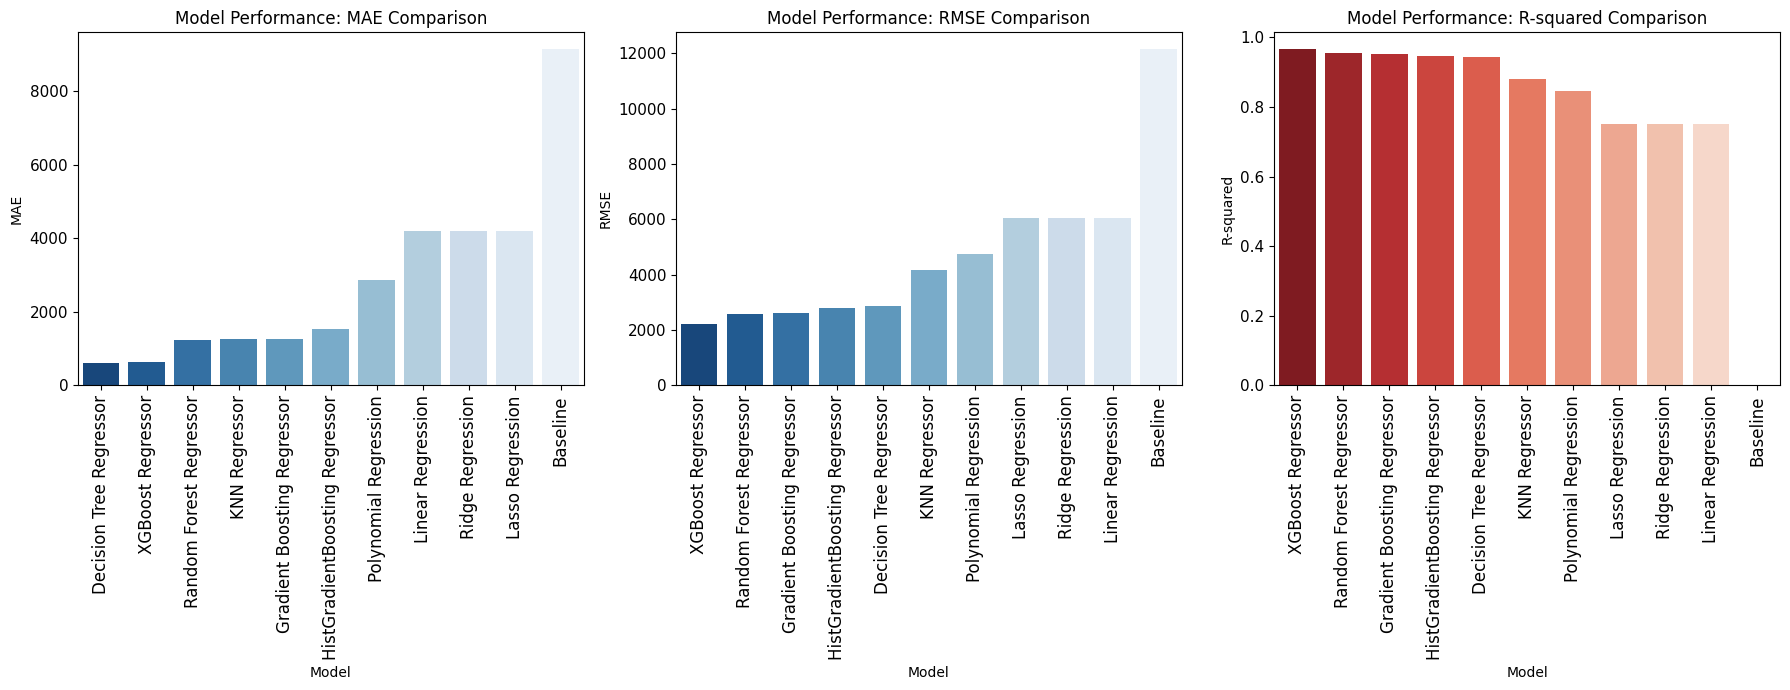

In [ ]:
# Create a figure with three subplots for MAE, RMSE and R-squared
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Plot MAE
sns.barplot(ax=axes[0], x='Model', y='MAE', data=model_performance_df.sort_values(by='MAE', ascending=True), palette='Blues_r')
axes[0].set_title('Model Performance: MAE Comparison')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=90, labelsize=12)
axes[0].tick_params(axis='y', labelsize=11)

# Plot RMSE
sns.barplot(ax=axes[1], x='Model', y='RMSE', data=model_performance_df.sort_values(by='RMSE', ascending=True), palette='Blues_r')
axes[1].set_title('Model Performance: RMSE Comparison')
axes[1].set_xlabel('Model' )
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=90, labelsize=12)
axes[1].tick_params(axis='y', labelsize=11)

# Plot R-squared
sns.barplot(ax=axes[2], x='Model', y='R-squared', data=model_performance_df.sort_values(by='R-squared', ascending=False), palette='Reds_r')
axes[2].set_title('Model Performance: R-squared Comparison')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R-squared')
axes[2].tick_params(axis='x', rotation=90, labelsize=12)
axes[2].tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.show()

In [ ]:
# get the feature importances from the XGBoost Regressor
feature_importances_xgb = best_xgb_model.feature_importances_

# get the feature names
feature_names_xgb = X_xgb.columns

# create a DataFrame to display feature importances
feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names_xgb, 'Importance': feature_importances_xgb})

# sort features by importance
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

display(feature_importance_df_xgb)

,Feature,Importance
4,smoker,0.885000
2,BMI,0.040514
0,age,0.034326
5,region,0.015849
3,children,0.014901
1,gender,0.009410


/tmp/ipython-input-533776906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



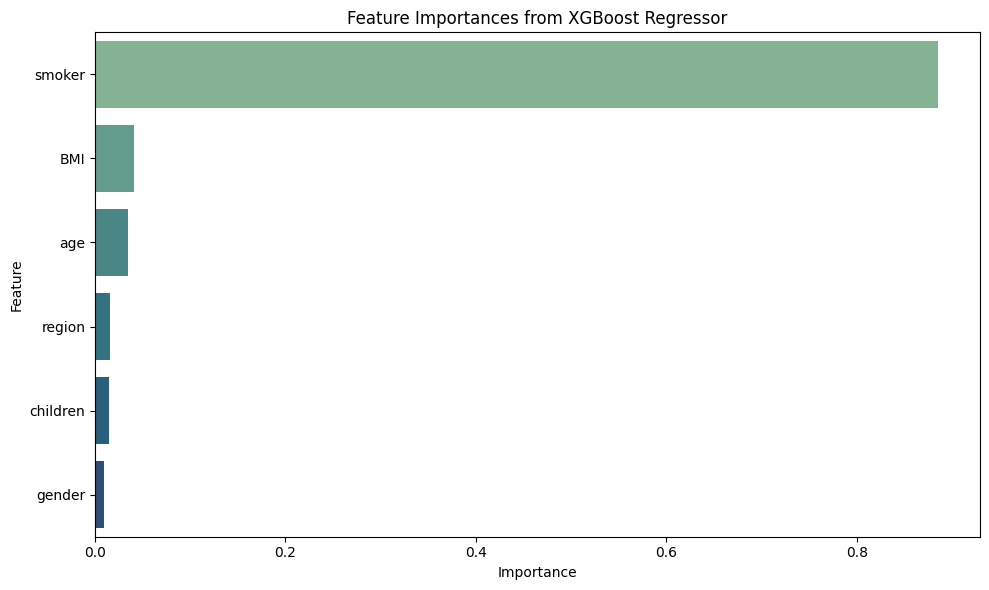

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb, palette='crest')
plt.title('Feature Importances from XGBoost Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# creating a sample bucket to visualize the cost of smoking in 5 random non-smokers

results = []

# randomly select 5 unique indices from the DataFrame
random_indices = insurance_df.sample(n=5, random_state=0).index.tolist()

# iterate through the selected random individuals
for i, idx in enumerate(random_indices):
    sample_person = insurance_df.drop(columns=['insurance_price']).loc[idx].copy()

    # create two scenarios: non-smoker and smoker
    sample_non_smoker = sample_person.copy()
    sample_non_smoker['smoker'] = 0

    sample_smoker = sample_person.copy()
    sample_smoker['smoker'] = 1

    # ensure the columns are in the same order as the training data X_xgb
    feature_names = X_xgb.columns
    sample_non_smoker_df = pd.DataFrame([sample_non_smoker], columns=feature_names)
    sample_smoker_df = pd.DataFrame([sample_smoker], columns=feature_names)

    # predict prices using the best_xgb_model
    price_non_smoker = best_xgb_model.predict(sample_non_smoker_df)[0]
    price_smoker = best_xgb_model.predict(sample_smoker_df)[0]

    # calculate the increase
    price_increase = price_smoker - price_non_smoker

    results.append({
        'Sample_ID': idx, # Using original DataFrame index as Sample_ID
        'Original_Smoker_Status': sample_person['smoker'],
        'Predicted_Non_Smoker_Price': price_non_smoker,
        'Predicted_Smoker_Price': price_smoker,
        'Price_Increase_If_Smoker': price_increase
    })

    print(f"\nIndividual (Original Index: {idx}, Original Smoker Status: {sample_person['smoker']}):")
    print(f"  Predicted price if non-smoker: ${price_non_smoker:.2f}")
    print(f"  Predicted price if smoker:     ${price_smoker:.2f}")
    print(f"  Estimated price increase:      ${price_increase:.2f}")

results_df_random = pd.DataFrame(results)
print("\nSummary of Price Changes (Random Samples):")
display(results_df_random.round(2))


Individual (Original Index: 1362, Original Smoker Status: 0.0):
  Predicted price if non-smoker: $8965.83
  Predicted price if smoker:     $19895.90
  Estimated price increase:      $10930.07

Individual (Original Index: 2543, Original Smoker Status: 0.0):
  Predicted price if non-smoker: $4530.18
  Predicted price if smoker:     $17303.95
  Estimated price increase:      $12773.77

Individual (Original Index: 2229, Original Smoker Status: 0.0):
  Predicted price if non-smoker: $11731.44
  Predicted price if smoker:     $23315.32
  Estimated price increase:      $11583.88

Individual (Original Index: 2048, Original Smoker Status: 0.0):
  Predicted price if non-smoker: $3945.26
  Predicted price if smoker:     $33153.18
  Estimated price increase:      $29207.92

Individual (Original Index: 446, Original Smoker Status: 0.0):
  Predicted price if non-smoker: $4685.57
  Predicted price if smoker:     $39034.12
  Estimated price increase:      $34348.55

Summary of Price Changes (Random S

,Sample_ID,Original_Smoker_Status,Predicted_Non_Smoker_Price,Predicted_Smoker_Price,Price_Increase_If_Smoker
0,1362,0.0,8965.830078,19895.900391,10930.070312
1,2543,0.0,4530.180176,17303.949219,12773.769531
2,2229,0.0,11731.440430,23315.320312,11583.879883
3,2048,0.0,3945.260010,33153.179688,29207.919922
4,446,0.0,4685.569824,39034.121094,34348.550781


In [ ]:
random_indices = results_df_random['Sample_ID'].tolist()
display(insurance_df.loc[random_indices])

,age,gender,BMI,children,smoker,region,insurance_price
1362,39,1,24.225,5,0,1,8965.79575
2543,29,1,24.600,2,0,3,4529.47700
2229,53,1,23.750,2,0,2,11729.67950
2048,29,1,31.160,0,0,2,3943.59540
446,32,2,46.530,2,0,4,4686.38870


# **XGBoost Without Smoker**

Performing 5-fold cross-validation...
  Fold 1 - MAE: 1578.362, RMSE: 5208.617, R^2: 0.806
  Fold 2 - MAE: 1964.889, RMSE: 5907.060, R^2: 0.770
  Fold 3 - MAE: 1900.365, RMSE: 6158.765, R^2: 0.746
  Fold 4 - MAE: 2544.914, RMSE: 6864.372, R^2: 0.718
  Fold 5 - MAE: 1704.675, RMSE: 4978.693, R^2: 0.809

Average MAE across all folds: 1938.641
Average RMSE across all folds: 5823.501
Average R^2 score across all folds: 0.770

--- XGBoost Evaluation without 'smoker' feature ---
Average MAE without 'smoker' feature: 1938.641
Average RMSE without 'smoker' feature: 5823.501
Average R-squared without 'smoker' feature: 0.770

--- Feature Importances from XGBoost Regressor (without 'smoker' feature) ---


,Feature,Importance
2,BMI,0.224240
0,age,0.211236
4,region,0.209890
3,children,0.194808
1,gender,0.159827


/tmp/ipython-input-1932789860.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



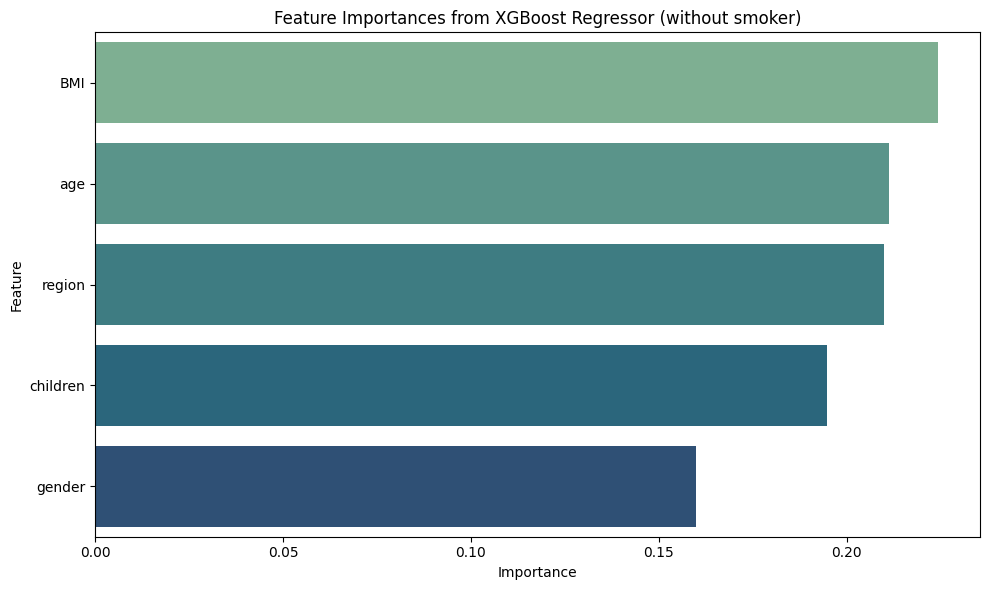

In [ ]:
import copy

X_xgb_no_smoker = X_xgb.drop(columns=['smoker'])
y_xgb_new = y_xgb.copy()

# create a deep copy of the best_xgb_model so that its state is not altered
# during the k-fold evaluation without the 'smoker' feature.
best_xgb_model_copy = copy.deepcopy(best_xgb_model)

# run K-Fold evaluation using the copied XGBoost model on data without 'smoker'
avg_mae_no_smoker, avg_rmse_no_smoker, avg_r2_no_smoker, rmse_folds_no_smoker, r2_folds_no_smoker, feature_importances_xgb_no_smoker = run_kfold_evaluation(
    best_xgb_model_copy, X_xgb_no_smoker, y_xgb_new, n_splits=5
)

print("\n--- XGBoost Evaluation without 'smoker' feature ---")
print(f"Average MAE without 'smoker' feature: {avg_mae_no_smoker:.3f}")
print(f"Average RMSE without 'smoker' feature: {avg_rmse_no_smoker:.3f}")
print(f"Average R-squared without 'smoker' feature: {avg_r2_no_smoker:.3f}")

# display feature importances if available from the k-fold evaluation
if feature_importances_xgb_no_smoker is not None:
    feature_names_xgb_no_smoker = X_xgb_no_smoker.columns
    feature_importance_df_xgb_no_smoker = pd.DataFrame({
        'Feature': feature_names_xgb_no_smoker,
        'Importance': feature_importances_xgb_no_smoker
    })
    feature_importance_df_xgb_no_smoker = feature_importance_df_xgb_no_smoker.sort_values(by='Importance', ascending=False)

    print("\n--- Feature Importances from XGBoost Regressor (without 'smoker' feature) ---")
    display(feature_importance_df_xgb_no_smoker)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb_no_smoker, palette='crest')
    plt.title('Feature Importances from XGBoost Regressor (without smoker)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("\nFeature importances are not available for this model/setup from run_kfold_evaluation.")

#This is the begining of the classification code, initialy calculating how to pick bins for the 3 part classification (Reid)

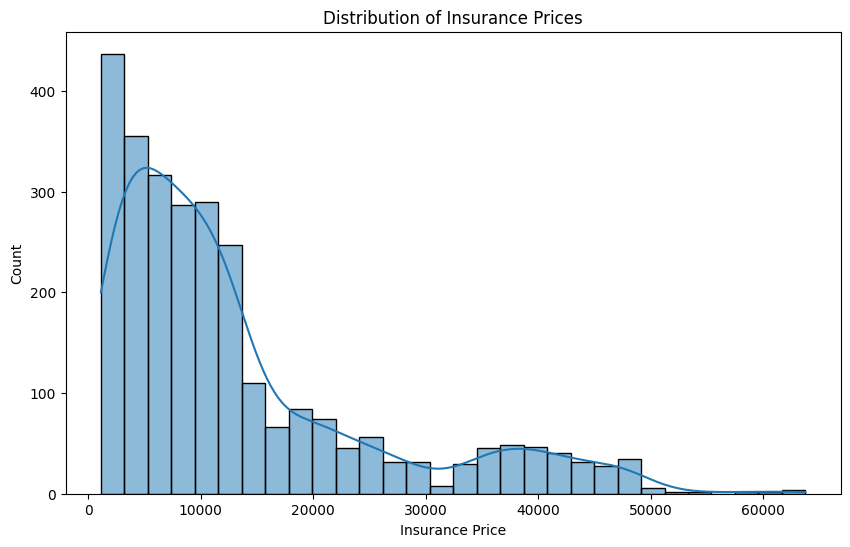

In [ ]:
# Classification Cornor, code generated from Chatgpt

plt.figure(figsize=(10,6))
sns.histplot(insurance_df['insurance_price'], bins=30, kde=True)
plt.title("Distribution of Insurance Prices")
plt.xlabel("Insurance Price")
plt.ylabel("Count")
plt.show()

## Looks like easiest divides are from 0-15000,15000-30000,30000+

In [ ]:
# Creating new DF to mess with so I don't brick primary code
bucketed = insurance_df.copy()
#Dropping values above

#Bucketing Values
bucketed.sort_values(by='insurance_price', ascending=False)[['age', 'smoker', 'BMI', 'insurance_price']].head(20)

,age,smoker,BMI,insurance_price
535,54,1,47.410,63770.42801
1920,54,1,47.410,63770.42801
2675,45,1,30.360,62592.87309
1292,45,1,30.360,62592.87309
2606,52,1,34.485,60021.39897
1222,52,1,34.485,60021.39897
1954,31,1,38.095,58571.07448
569,31,1,38.095,58571.07448
2195,33,1,35.530,55135.40209
811,33,1,35.530,55135.40209


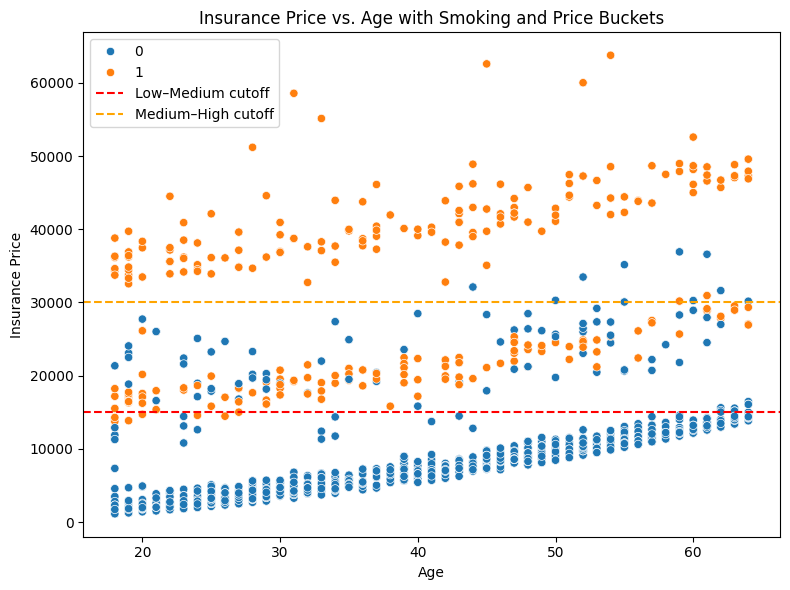

In [ ]:
# Still Chatgpt Code
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=bucketed, x='age', y='insurance_price', hue='smoker', ax=ax)

# Horizontal cutoff lines
ax.axhline(y=15000, color='red', linestyle='--', label='Low–Medium cutoff')
ax.axhline(y=30000, color='orange', linestyle='--', label='Medium–High cutoff')

# Set x-axis ticks every 10 years cleanly
ax.xaxis.set_major_locator(MultipleLocator(10))

# Labels and legend
ax.set_xlabel('Age')
ax.set_ylabel('Insurance Price')
ax.legend()
title = 'Insurance Price vs. Age with Smoking and Price Buckets'
plt.title(title)

plt.tight_layout()
plt.show()



In [ ]:
# Creating the buckets to classify Users

bucketed['price_level'] = pd.cut(
    bucketed['insurance_price'],
    bins=[0, 15000, 30000, bucketed['insurance_price'].max()],
    labels=['low', 'medium', 'high']
)


In [ ]:
# Checking for distribution of classes throughout the data set
print(bucketed['price_level'].value_counts())


price_level
low       2025
medium     397
high       339
Name: count, dtype: int64


#### Two part Model Using Random Forest Regression and Classification

In [ ]:
# ---------------------------------------------------
# TWO-STAGE MODEL: CLASSIFY (low/medium/high) → REGRESS (price)
# Using Random Forest Classification and Regression
# This model will first categorize individual users into cost bucket profiles
#(insurance price as a variable is excluded) to then be fed into our 3
# Specialized regression models trained off of data from the responding
#Price model. So a Low Medium and High price regression
#
# ---------------------------------------------------
# (Made With AI Assistance)


# ----------------------------------------
# DATA PREP
# ----------------------------------------
X = bucketed.drop(columns=['insurance_price', 'price_level'])
y_class = bucketed['price_level']
y_reg = bucketed['insurance_price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.20, random_state=42, stratify=y_class
)

# ----------------------------------------
# STAGE 1 – REGULARIZED DECISION TREE
# ----------------------------------------
model_class = DecisionTreeClassifier(
    max_depth=3,             # lower depth → reduces overfitting
    min_samples_split=40,    # prevents tiny branches
    min_samples_leaf=20,     # prevents leaf overfitting
    class_weight="balanced",
    random_state=42
)

model_class.fit(X_train, y_class_train)
y_class_pred = model_class.predict(X_test)

print("Classification Report (Stage 1 – Bucket Prediction):")
print(confusion_matrix(y_class_test, y_class_pred))
print(classification_report(y_class_test, y_class_pred))

# ----------------------------------------
# STAGE 2 – REGULARIZED RANDOM FOREST PER BUCKET
# ----------------------------------------
bucket_models = {}

for bucket in ['low', 'medium', 'high']:

    bucket_df = bucketed[bucketed['price_level'] == bucket]
    if bucket_df.empty:
        print(f"⚠️ Skipping bucket '{bucket}' — no data found.")
        continue

    X_b = bucket_df.drop(columns=['insurance_price', 'price_level'])
    X_b = pd.get_dummies(X_b, drop_first=True)
    y_b = bucket_df['insurance_price']

    if len(X_b) > 0:

        reg = RandomForestRegressor(
            n_estimators=150,           # lower → less variance
            max_depth=8,                # prevents overly deep trees
            min_samples_split=20,       # avoids tiny splits
            min_samples_leaf=10,        # avoids noisy small leaves
            max_features="sqrt",        # adds randomness → less overfit
            bootstrap=True,             # essential for generalization
            random_state=42,
            n_jobs=-1
        )

        reg.fit(X_b, y_b)
        bucket_models[bucket] = reg
        print(f"✅ Trained RandomForestRegressor for '{bucket}' with {len(X_b)} samples.")

# ----------------------------------------
# CASCADE PREDICTIONS aka Feeding classification results
# into specialized regression
# ----------------------------------------
predicted_buckets = model_class.predict(X_test)

price_preds = []
for i, bucket in enumerate(predicted_buckets):

    if bucket not in bucket_models:
        price_preds.append(bucketed['insurance_price'].mean())
        continue

    reg_model = bucket_models[bucket]

    row = X_test.iloc[i:i+1]
    row = row.reindex(columns=reg_model.feature_names_in_, fill_value=0)

    price_pred = reg_model.predict(row)[0]
    price_preds.append(price_pred)

# ----------------------------------------
# 5️⃣ EVALUATE FINAL REGRESSION PERFORMANCE
# This factors in both classification and regression accuracy
# ----------------------------------------
print("\nRegression Results (Stage 2 – Regularized Random Forest):")
print("MAE:", mean_absolute_error(y_reg_test, price_preds))
print("R² :", r2_score(y_reg_test, price_preds))

Classification Report (Stage 1 – Bucket Prediction):
[[ 59   7   2]
 [  0 402   4]
 [  2  27  50]]
              precision    recall  f1-score   support

        high       0.97      0.87      0.91        68
         low       0.92      0.99      0.95       406
      medium       0.89      0.63      0.74        79

    accuracy                           0.92       553
   macro avg       0.93      0.83      0.87       553
weighted avg       0.92      0.92      0.92       553

✅ Trained RandomForestRegressor for 'low' with 2025 samples.
✅ Trained RandomForestRegressor for 'medium' with 397 samples.
✅ Trained RandomForestRegressor for 'high' with 339 samples.

Regression Results (Stage 2 – Regularized Random Forest):
MAE: 1884.3649743773688
R² : 0.8601448046211004


### Two part Model using Random Forest Classification and XGBoost Regression

In [ ]:
# ---------------------------------------------------
# TWO-STAGE MODEL: CLASSIFY (low/medium/high)
# → REGRESS (XGBoost per bucket)

# Random forest Classification feeding into a XGBoosted regression
# Random forest in testing had a better classifying accuracy


#### Not modified to reduce over fitting ####
# ---------------------------------------------------


# ----------------------------------------
# 1️⃣ DATA PREP
# ----------------------------------------
# bucketed DataFrame should contain:
# 'insurance_price', 'price_level' (low/medium/high), and predictor columns

X = bucketed.drop(columns=['insurance_price', 'price_level'])
y_class = bucketed['price_level']
y_reg = bucketed['insurance_price']

# One-hot encode all categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train/test split (stratify keeps low/med/high distributed)
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg,
    test_size=0.20,
    random_state=42,
    stratify=y_class
)

# ----------------------------------------
# 2️⃣ STAGE 1 — RANDOM FOREST CLASSIFICATION
# ----------------------------------------
model_class = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    class_weight="balanced",
    random_state=42
)

model_class.fit(X_train, y_class_train)
y_class_pred = model_class.predict(X_test)

print("Classification Report (Stage 1):")
print(confusion_matrix(y_class_test, y_class_pred))
print(classification_report(y_class_test, y_class_pred))

# ----------------------------------------
# 3️⃣ STAGE 2 — TRAIN ONE XGBOOST MODEL PER BUCKET
# ----------------------------------------
bucket_models = {}

for bucket in ['low', 'medium', 'high']:
    bucket_df = bucketed[bucketed['price_level'] == bucket]

    if bucket_df.empty:
        print(f"⚠️ No samples found for bucket: {bucket}. Skipping.")
        continue

    # Features + one-hot encode
    X_b = bucket_df.drop(columns=['insurance_price', 'price_level'])
    X_b = pd.get_dummies(X_b, drop_first=True)
    y_b = bucket_df['insurance_price']

    # Train XGBoost Regressor
    xgb = XGBRegressor(
        n_estimators=700,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.9,
        colsample_bytree=0.9,
        objective='reg:squarederror',
        random_state=42
    )

    xgb.fit(X_b, y_b)
    bucket_models[bucket] = xgb

    print(f"✅ Trained XGBRegressor for '{bucket}' with {len(X_b)} samples.")

# ----------------------------------------
# 4️⃣ CASCADE PREDICTIONS
# ----------------------------------------
predicted_buckets = model_class.predict(X_test)

price_preds = []

for i, bucket in enumerate(predicted_buckets):

    # Fallback if bucket is missing
    if bucket not in bucket_models:
        price_preds.append(bucketed['insurance_price'].mean())
        continue

    model = bucket_models[bucket]

    # Match feature columns to trained model
    row = X_test.iloc[i:i+1]
    row = row.reindex(columns=model.feature_names_in_, fill_value=0)

    pred = model.predict(row)[0]
    price_preds.append(pred)

# ----------------------------------------
# 5️⃣ EVALUATE FINAL PERFORMANCE
# ----------------------------------------
print("\nRegression Results (Stage 2 – XGBoost):")
print("MAE:", mean_absolute_error(y_reg_test, price_preds))
print("R² :", r2_score(y_reg_test, price_preds))

Classification Report (Stage 1):
[[ 59   7   2]
 [  0 403   3]
 [  0  27  52]]
              precision    recall  f1-score   support

        high       1.00      0.87      0.93        68
         low       0.92      0.99      0.96       406
      medium       0.91      0.66      0.76        79

    accuracy                           0.93       553
   macro avg       0.94      0.84      0.88       553
weighted avg       0.93      0.93      0.93       553

✅ Trained XGBRegressor for 'low' with 2025 samples.
✅ Trained XGBRegressor for 'medium' with 397 samples.
✅ Trained XGBRegressor for 'high' with 339 samples.

Regression Results (Stage 2 – XGBoost):
MAE: 1115.8983066828664
R² : 0.8765975736946888
